In [6]:
# !python -m pip install --upgrade pip setuptools

  Using cached setuptools-75.8.0-py3-none-any.whl.metadata (6.7 kB)
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
    --------------------------------------- 0.0/1.8 MB 640.0 kB/s eta 0:00:03
   ------ --------------------------------- 0.3/1.8 MB 3.9 MB/s eta 0:00:01
   -------------------- ------------------- 0.9/1.8 MB 7.2 MB/s eta 0:00:01
   -------------------------------- ------- 1.5/1.8 MB 8.6 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 8.9 MB/s eta 0:00:00
Using cached setuptools-75.8.0-py3-none-any.whl (1.2 MB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 69.5.1
    Uninstalling setuptools-69.5.1:
      Successfully uninstalled setuptools-69.5.1
  Attempting uninstall: pip
    Found existing installation: pip 24.0
    Uninstalling pip-24.0:
      Successfully uninstalled pip-24.0


In [7]:
# !pip install torch torchvision

In [2]:
#!conda install pytorch torchvision torchaudio pytorch-cuda=11.8 -c pytorch -c nvidia
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"


In [4]:
!git clone https://github.com/facebookresearch/detectron2.git C:/Users/shawn/detectron2
%cd C:/Users/shawn/detectron2
!pip install -e ./

C:\Users\shawn\detectron2


Cloning into 'C:/Users/shawn/detectron2'...


Obtaining file:///C:/Users/shawn/detectron2
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py develop for detectron2


  DEPRECATION: Legacy editable install of detectron2==0.6 from file:///C:/Users/shawn/detectron2 (setup.py develop) is deprecated. pip 25.0 will enforce this behaviour change. A possible replacement is to add a pyproject.toml or enable --use-pep517, and use setuptools >= 64. If the resulting installation is not behaving as expected, try using --config-settings editable_mode=compat. Please consult the setuptools documentation for more information. Discussion can be found at https://github.com/pypa/pip/issues/11457


In [4]:
# !pip install opencv-python-headless
#!pip install opencv-python==4.8.0.74
# # Full installation with contrib modules
# !pip install opencv-contrib-python

In [6]:
import os
import cv2
import torch
import numpy as np
from matplotlib import pyplot as plt
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog



C:\Users\shawn\anaconda3\Lib\site-packages\fvcore\common\checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=torch.device("cpu

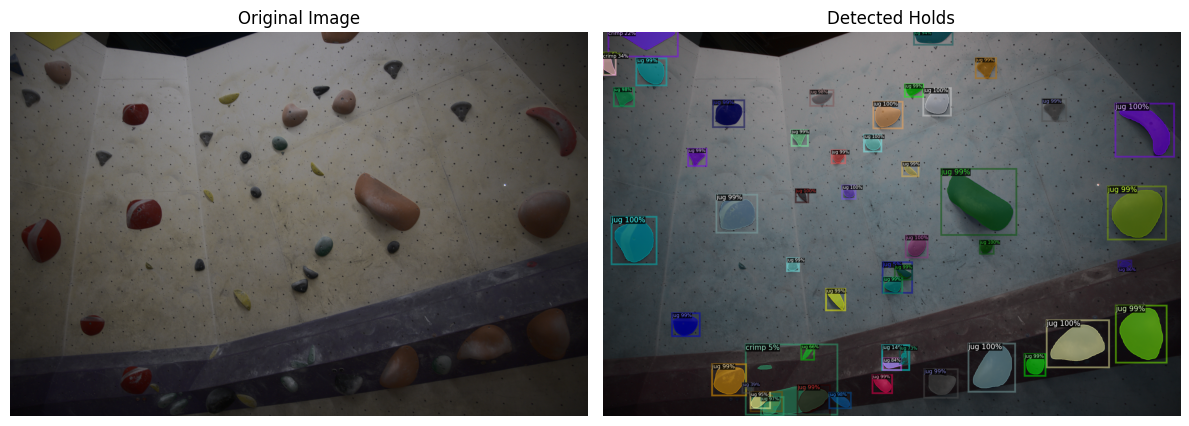

In [8]:
# Step 1: Configure the model
def setup_model(model_dir, device="cpu"):
    cfg = get_cfg()
    cfg.merge_from_file(os.path.join(model_dir, "experiment_config.yml"))
    cfg.MODEL.WEIGHTS = os.path.join(model_dir, "model_final.pth")
    cfg.MODEL.DEVICE = device
    MetadataCatalog.get("climbing_holds").thing_classes = ["jug", "crimp", "sloper", "pinch"]
    return DefaultPredictor(cfg), MetadataCatalog.get("climbing_holds")

# Step 2: Process image and detect holds
def detect_holds(model_dir, image_path, device="cpu"):
    predictor, metadata = setup_model(model_dir, device)
    img = cv2.imread(image_path)
    outputs = predictor(img)
    
    # Visualize the detections
    v = Visualizer(img[:, :, ::-1], metadata=metadata)
    out_predictions = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    return img, out_predictions.get_image()

# Input paths
MODEL_DIRECTORY ="C:/Users/shawn/Downloads/dataset1/model"  # Replace with your model path
IMAGE_PATH =  "C:/Users/shawn/Downloads/dataset1/sm/298.jpg"            # Replace with your climbing wall image

# Run detection
original_image, detected_image = detect_holds(MODEL_DIRECTORY, IMAGE_PATH)

# Display results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
ax1.axis('off')
ax1.set_title("Original Image")

ax2.imshow(cv2.cvtColor(detected_image, cv2.COLOR_BGR2RGB))
ax2.axis('off')
ax2.set_title("Detected Holds")

plt.tight_layout()
plt.show()